In [39]:
# General
import warnings
import numpy as np
import pandas as pd
import opendatasets as od

# Visuals 
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
from scipy.stats import skew
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import learning_curve

# Preparation
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ML models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=df.drop(columns=['label'],axis = 1)
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
pca = PCA()
pca.fit(X)
pca_data = pca.transform(X)

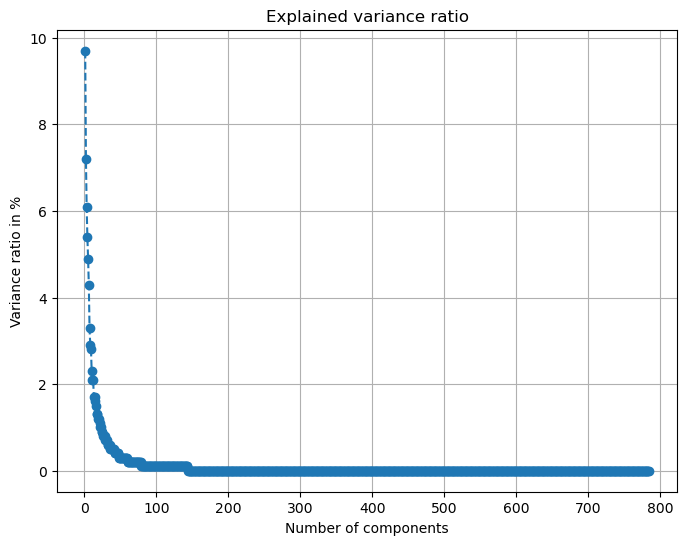

In [6]:
variations = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range (1, len(variations)+1)]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(variations) + 1), 
         variations, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Variance ratio in %')
plt.title('Explained variance ratio')
plt.grid(True)
plt.show()

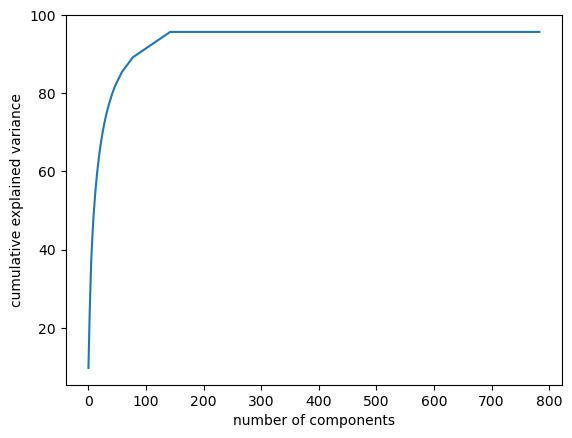

In [38]:
plt.plot(np.cumsum(variations)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

In [7]:
variance_ratio_percentage = 95
variance_ratio = np.cumsum(variations)
num_components = np.argmax(variance_ratio >= variance_ratio_percentage) + 1
print("Percentage of variance:", variance_ratio_percentage)
print("Number of components:", num_components)

Percentage of variance: 95
Number of components: 137


In [8]:
pca = PCA(n_components=150)
df_transformed = pca.fit_transform(X)
print("original shape df_encoded:", X.shape)
print("transformed shape df_transformed:", df_transformed.shape)

original shape df_encoded: (42000, 784)
transformed shape df_transformed: (42000, 150)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_transformed, y, test_size=0.25, random_state=42)

In [10]:
print("shape X_train:", X_train.shape)
print("shape X_test:", X_test.shape)
print("shape y_train:", y_train.shape)
print("shape y_test:", y_test.shape)

shape X_train: (31500, 150)
shape X_test: (10500, 150)
shape y_train: (31500,)
shape y_test: (10500,)


In [34]:
log_model = LogisticRegression() # Logistic Regression
dt_model = DecisionTreeClassifier() # Decision Tree
rf_model = RandomForestClassifier() # Random Forest
gb_model = GradientBoostingClassifier() # Gradient Boosting
knn_model = KNeighborsClassifier() # k-Nearest Neighbors
mlp_model = MLPClassifier() # Neural Network
svc_model = SVC() # Support Vector Machine

In [12]:
accuracy_models = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'Mean Squared Error', 'Mean Absolute Error' ])

In [13]:
log_model.fit(X_train, y_train)
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'Logistic Regression', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_log_model = confusion_matrix(y_test, y_test_pred)

In [14]:
dt_model.fit(X_train, y_train)
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'Decision Tree', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_dt_model = confusion_matrix(y_test, y_test_pred)

In [15]:
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'Random Forest', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_rf_model = confusion_matrix(y_test, y_test_pred)

In [16]:
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'k-Nearest Neighbors', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_knn_model = confusion_matrix(y_test, y_test_pred)

In [17]:
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'Neural Network', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_mlp_model = confusion_matrix(y_test, y_test_pred)

In [ ]:
svc_model.fit(X_train, y_train)
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_models = accuracy_models.append({'Model': 'Support Vector Machine', 'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}, ignore_index=True)
confusion_svc_model = confusion_matrix(y_test, y_test_pred)   

In [19]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'MLP', 'SVC']
confusion_matrices = [confusion_log_model, confusion_dt_model, confusion_rf_model,  confusion_knn_model, confusion_mlp_model, confusion_svc_model]

confusion_matrices_with_names = zip(model_names, confusion_matrices)

for model_name, confusion in confusion_matrices_with_names:
    print(f"Confusion Matrix for {model_name}:")
    print(confusion)
    print()

Confusion Matrix for Logistic Regression:
[[ 978    0    6    0    4   18   12    3    3    1]
 [   0 1120    1    3    1    5    1    2   12    1]
 [  12   12  964   17   16    8   15    9   16    3]
 [   4    8   29 1012    1   37    4   13   25   18]
 [   6    5    7    2  955    2    9    4    2   32]
 [  14    6    5   26   16  778   21    6   19    7]
 [  11    5    5    0    8   12  962    2    5    0]
 [   1   10   23    4   15    1    0 1038    4   39]
 [   7   33   12   29   12   31    6    4  861   10]
 [   9    3    5   14   26    9    1   30   10  927]]

Confusion Matrix for Decision Tree:
[[ 905    0   13   14    7   22   24   10   19   11]
 [   0 1090    8    3    4    5    8   15   10    3]
 [  16    9  860   54   20   15   24   24   39   11]
 [  16   10   37  887    7   77    6   22   60   29]
 [   5    5   25   12  778   32   26   22   19  100]
 [  15    9   21   62   21  639   30   16   64   21]
 [  28    6   20   18   23   25  860    7   15    8]
 [   4    9   30   

In [24]:
def plot_learning_curve(model, X_train, y_train, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='red')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)

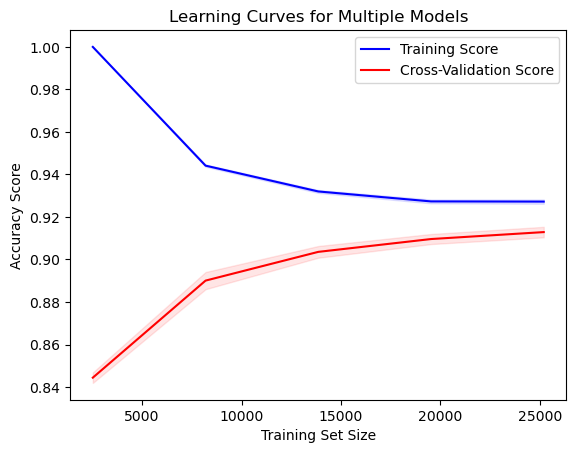

In [25]:
plot_learning_curve(log_model, X_train, y_train)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves for Logistic Regression')
plt.legend()
plt.show()

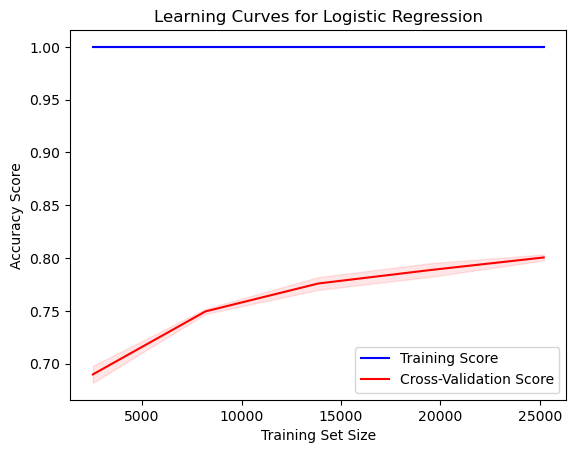

In [26]:
plot_learning_curve(dt_model, X_train, y_train)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves for Decision Tree')
plt.legend()
plt.show()

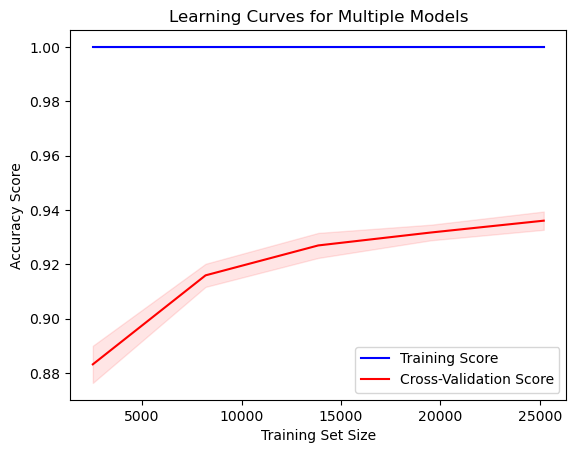

In [27]:
plot_learning_curve(rf_model, X_train, y_train)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves for Random Forest')
plt.legend()
plt.show()

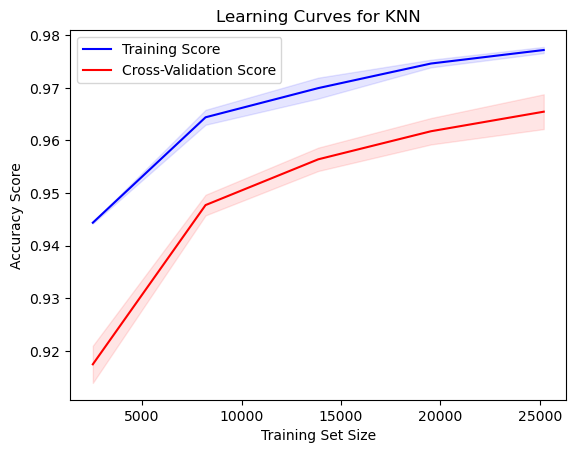

In [29]:
plot_learning_curve(knn_model, X_train, y_train)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves for KNN')
plt.legend()
plt.show()

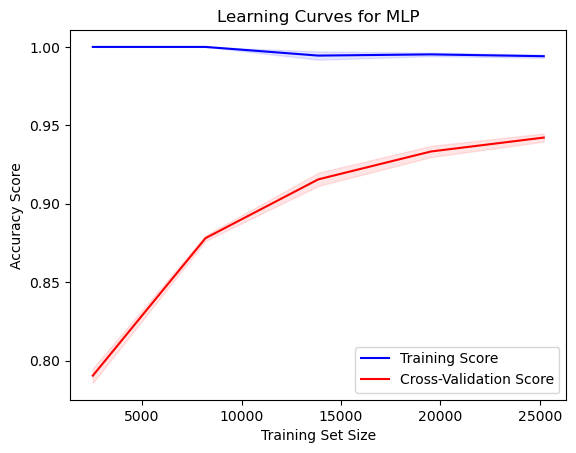

In [30]:
plot_learning_curve(mlp_model, X_train, y_train)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves for MLP')
plt.legend()
plt.show()

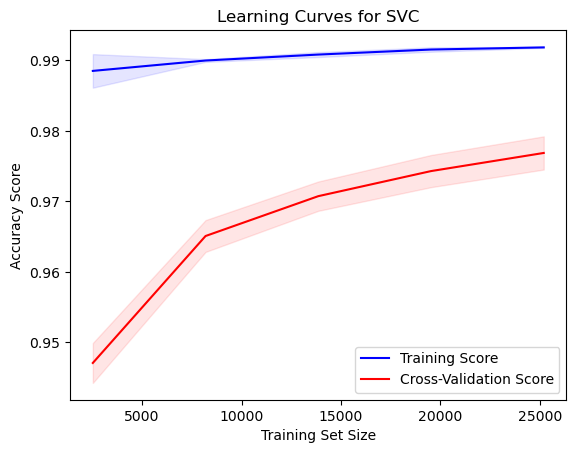

In [35]:
plot_learning_curve(svc_model, X_train, y_train)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves for SVC')
plt.legend()
plt.show()

In [ ]:
accuracy_models.head(12)

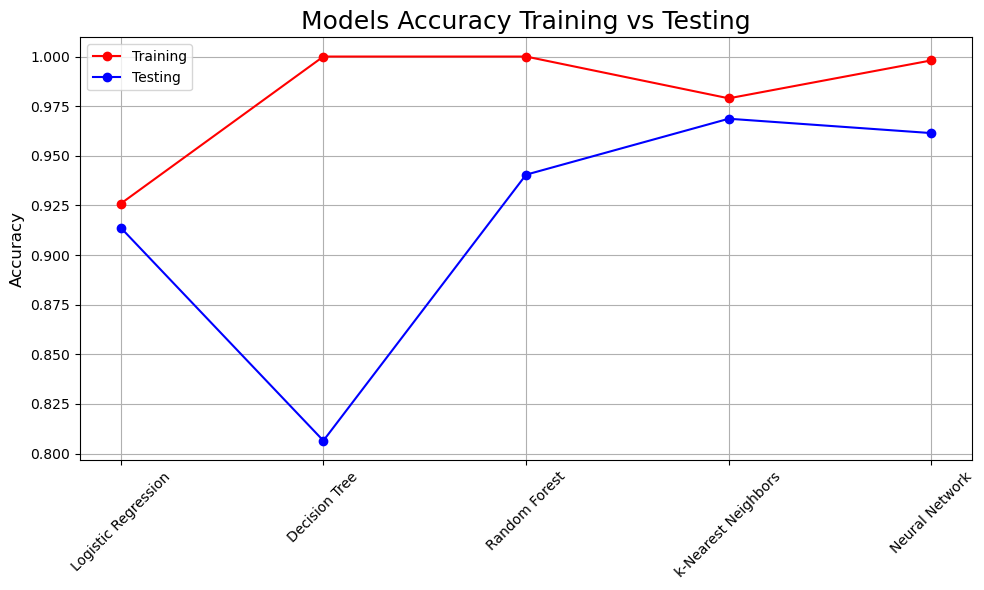

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(accuracy_models['Model'], accuracy_models['Training Accuracy'], marker='o', linestyle='-', color='red', label='Training')
plt.plot(accuracy_models['Model'], accuracy_models['Testing Accuracy'], marker='o', linestyle='-', color='blue', label='Testing')
plt.ylabel('Accuracy', fontsize=12)
plt.title('Models Accuracy Training vs Testing', fontsize=18)
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(fontsize=10) 
plt.grid(True)
plt.tight_layout()
plt.show()

# GridSearch

In [ ]:
## Define hyperparameters to tune

In [66]:
'''
param_log_model = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

param_dt_model = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_rf_model = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_knn_model = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

param_mlp_model = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

param_svc_model = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
'''

"\nparam_log_model = {\n    'C': [0.001, 0.01, 0.1, 1, 10],\n    'penalty': ['l1', 'l2', 'none'],\n    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']\n}\n\nparam_dt_model = {\n    'criterion': ['gini', 'entropy'],\n    'max_depth': [None, 5, 10, 15],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n\nparam_rf_model = {\n    'n_estimators': [100, 200, 300],\n    'criterion': ['gini', 'entropy'],\n    'max_depth': [None, 5, 10, 15],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'max_features': ['auto', 'sqrt', 'log2']\n}\n\nparam_knn_model = {\n    'n_neighbors': [3, 5, 7, 9],\n    'weights': ['uniform', 'distance'],\n    'p': [1, 2]\n}\n\nparam_mlp_model = {\n    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],\n    'activation': ['identity', 'logistic', 'tanh', 'relu'],\n    'solver': ['adam', 'lbfgs', 'sgd'],\n    'alpha': [0.0001, 0.001, 0.01]\n}\n\nparam_svc_model = {\n    'C': [0.1, 1, 10],\n    'ke

In [82]:
param_log_model = {
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['saga']
}

param_dt_model = {
    'criterion': ['gini'],
    'max_depth': [15, 20, 30]
}   

param_rf_model = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini'],
    'max_depth': [ 5, 15, 25],
}

In [37]:
## Define GridSearch models

In [83]:
GS_log_model = GridSearchCV(estimator = log_model, 
                  param_grid = param_log_model,
                  scoring = ["r2", 'neg_root_mean_squared_error'],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

GS_dt_model = GridSearchCV(estimator = dt_model, 
                  param_grid = param_dt_model,
                  scoring = ["r2", 'neg_root_mean_squared_error'],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

GS_rf_model = GridSearchCV(estimator = rf_model, 
                  param_grid = param_rf_model,
                  scoring = ["r2", 'neg_root_mean_squared_error'],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

GS_svc_model = GridSearchCV(estimator = svc_model, 
                  param_grid = param_svc_model,
                  scoring = ["r2", 'neg_root_mean_squared_error'],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

GS_knn_model = GridSearchCV(estimator = knn_model, 
                  param_grid = param_knn_model,
                  scoring = ["r2", 'neg_root_mean_squared_error'],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

GS_mlp_model = GridSearchCV(estimator = mlp_model, 
                  param_grid = param_mlp_model,
                  scoring = ["r2", 'neg_root_mean_squared_error'],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

In [ ]:
## Fit GridSearch Models

In [47]:
accuracy_grid = pd.DataFrame(columns=['Model', 'Best R2','Training Accuracy','Testing Accuracy', 'Mean Squared Error', 'Mean Absolute Error', 'Best estimator', 'Best parametrs'])

In [54]:
GS_log_model.fit(X_train, y_train)

y_train_pred = GS_log_model.predict(X_train)
y_test_pred = GS_log_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

best_accuracy_score = GS_log_model.best_score_
best_estimator = GS_log_model.best_estimator_
best_parametrs = GS_log_model.best_params_
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_grid = accuracy_grid.append({'Model': 'Grid Logistic Regression', 'Best R2': best_accuracy_score,'Training Accuracy': train_accuracy,'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'Best estimator': best_estimator, 'Best parametrs': best_parametrs }, ignore_index=True)
confusion_GS_log_model = confusion_matrix(y_test, y_test_pred)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END C=0.001, solver=sag; neg_root_mean_squared_error: (test=-1.250) r2: (test=0.813) total time=   8.6s
[CV 2/5] END C=0.001, solver=sag; neg_root_mean_squared_error: (test=-1.245) r2: (test=0.814) total time=   8.5s
[CV 3/5] END C=0.001, solver=sag; neg_root_mean_squared_error: (test=-1.213) r2: (test=0.824) total time=   8.5s
[CV 4/5] END C=0.001, solver=sag; neg_root_mean_squared_error: (test=-1.251) r2: (test=0.813) total time=   8.5s
[CV 5/5] END C=0.001, solver=sag; neg_root_mean_squared_error: (test=-1.265) r2: (test=0.809) total time=   8.5s
[CV 1/5] END C=0.01, solver=sag; neg_root_mean_squared_error: (test=-1.250) r2: (test=0.813) total time=   8.5s
[CV 2/5] END C=0.01, solver=sag; neg_root_mean_squared_error: (test=-1.244) r2: (test=0.815) total time=   8.5s
[CV 3/5] END C=0.01, solver=sag; neg_root_mean_squared_error: (test=-1.213) r2: (test=0.824) total time=   8.5s
[CV 4/5] END C=0.01, solver=sag; neg_ro

In [80]:
GS_dt_model.fit(X_train, y_train)

y_train_pred = GS_dt_model.predict(X_train)
y_test_pred = GS_dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

best_accuracy_score = GS_dt_model.best_score_
best_estimator = GS_dt_model.best_estimator_
best_parametrs = GS_dt_model.best_params_
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_grid = accuracy_grid.append({'Model': 'Grid Decision Tree', 'Best R2': best_accuracy_score,'Training Accuracy': train_accuracy,'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'Best estimator': best_estimator, 'Best parametrs': best_parametrs }, ignore_index=True)
confusion_GS_dt_model = confusion_matrix(y_test, y_test_pred)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=gini, max_depth=15; neg_root_mean_squared_error: (test=-1.821) r2: (test=0.603) total time=   4.4s
[CV 2/5] END criterion=gini, max_depth=15; neg_root_mean_squared_error: (test=-1.820) r2: (test=0.603) total time=   4.4s
[CV 3/5] END criterion=gini, max_depth=15; neg_root_mean_squared_error: (test=-1.824) r2: (test=0.602) total time=   4.4s
[CV 4/5] END criterion=gini, max_depth=15; neg_root_mean_squared_error: (test=-1.854) r2: (test=0.588) total time=   4.4s
[CV 5/5] END criterion=gini, max_depth=15; neg_root_mean_squared_error: (test=-1.731) r2: (test=0.641) total time=   4.4s
[CV 1/5] END criterion=gini, max_depth=20; neg_root_mean_squared_error: (test=-1.855) r2: (test=0.588) total time=   5.2s
[CV 2/5] END criterion=gini, max_depth=20; neg_root_mean_squared_error: (test=-1.842) r2: (test=0.594) total time=   5.2s
[CV 3/5] END criterion=gini, max_depth=20; neg_root_mean_squared_error: (test=-1.801) 

In [84]:
GS_rf_model.fit(X_train, y_train)

y_train_pred = GS_rf_model.predict(X_train)
y_test_pred = GS_rf_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

best_accuracy_score = GS_rf_model.best_score_
best_estimator = GS_rf_model.best_estimator_
best_parametrs = GS_rf_model.best_params_
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_grid = accuracy_grid.append({'Model': 'Grid Random Forest', 'Best R2': best_accuracy_score,'Training Accuracy': train_accuracy,'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'Best estimator': best_estimator, 'Best parametrs': best_parametrs }, ignore_index=True)
confusion_GS_rf_model = confusion_matrix(y_test, y_test_pred)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-1.751) r2: (test=0.633) total time=   9.3s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-1.626) r2: (test=0.683) total time=  10.0s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-1.695) r2: (test=0.656) total time=  10.8s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-1.627) r2: (test=0.683) total time=  11.2s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-1.718) r2: (test=0.646) total time=  10.6s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=200; neg_root_mean_squared_error: (test=-1.761) r2: (test=0.629) total time=  19.3s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=200; neg_root_mean_squared_error: (test=-1.640) r2:

In [ ]:
GS_svc_model.fit(X_train, y_train)

y_train_pred = GS_svc_model.predict(X_train)
y_test_pred = GS_svc_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

best_accuracy_score = GS_svc_model.best_score_
best_estimator = GS_svc_model.best_estimator_
best_parametrs = GS_svc_model.best_params_
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_grid = accuracy_grid.append({'Model': 'Grid SVC', 'Best R2': best_accuracy_score,'Training Accuracy': train_accuracy,'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'Best estimator': best_estimator, 'Best parametrs': best_parametrs }, ignore_index=True)
confusion_GS_svc_model = confusion_matrix(y_test, y_test_pred)

In [ ]:
GS_knn_model.fit(X_train, y_train)

y_train_pred = GS_knn_model.predict(X_train)
y_test_pred = GS_knn_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

best_accuracy_score = GS_knn_model.best_score_
best_estimator = GS_knn_model.best_estimator_
best_parametrs = GS_knn_model.best_params_
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_grid = accuracy_grid.append({'Model': 'Grid KNN', 'Best R2': best_accuracy_score,'Training Accuracy': train_accuracy,'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'Best estimator': best_estimator, 'Best parametrs': best_parametrs }, ignore_index=True)
confusion_GS_knn_model = confusion_matrix(y_test, y_test_pred)

In [ ]:
GS_mlp_model.fit(X_train, y_train)

y_train_pred = GS_mlp_model.predict(X_train)
y_test_pred = GS_mlp_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

best_accuracy_score = GS_mlp_model.best_score_
best_estimator = GS_mlp_model.best_estimator_
best_parametrs = GS_mlp_model.best_params_
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
accuracy_grid = accuracy_grid.append({'Model': 'Grid MLP', 'Best R2': best_accuracy_score,'Training Accuracy': train_accuracy,'Testing Accuracy': test_accuracy, 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'Best estimator': best_estimator, 'Best parametrs': best_parametrs }, ignore_index=True)
confusion_GS_mlp_model = confusion_matrix(y_test, y_test_pred)

In [55]:
model_names = ['Grid Logistic Regression', 'Grid Decision Tree', 'Grid Random Forest', 'Grid KNN', 'Grid MLP', 'Grid SVC']
confusion_matrices = [confusion_GS_log_model, confusion_GS_dt_model, confusion_GS_rf_model,  confusion_GS_knn_model, confusion_GS_mlp_model, confusion_GS_svc_model]

confusion_matrices_with_names = zip(model_names, confusion_matrices)

for model_name, confusion in confusion_matrices_with_names:
    print(f"Confusion Matrix for {model_name}:")
    print(confusion)
    print()

Confusion Matrix for Grid Logistic Regression:
[[ 978    0    6    0    4   18   12    3    3    1]
 [   0 1121    1    3    1    5    1    1   12    1]
 [  11   12  964   17   16    8   15    9   17    3]
 [   4    8   30 1010    1   37    4   14   25   18]
 [   6    5    7    2  955    2    9    4    2   32]
 [  16    6    6   27   16  774   22    6   18    7]
 [  11    5    5    0    8   14  961    2    4    0]
 [   1   10   23    4   15    1    0 1039    4   38]
 [   7   33   12   29   12   30    6    4  862   10]
 [   9    3    5   14   26    9    1   31   10  926]]



In [81]:
accuracy_grid.head(20)

,Model,Best R2,Training Accuracy,Testing Accuracy,Mean Squared Error,Mean Absolute Error,Best estimator,Best parametrs
0,Logistic Regression,0.814557,0.925810,0.913333,1.507238,0.316000,"LogisticRegression(C=0.01, solver='sag')","{'C': 0.01, 'solver': 'sag'}"
1,Grid Decision Tree,0.499070,0.751778,0.729714,4.301048,0.955905,"DecisionTreeClassifier(criterion='entropy', ma...","{'criterion': 'entropy', 'max_depth': 7, 'min_..."
2,Grid Decision Tree,0.614439,0.966159,0.812762,3.140190,0.676381,DecisionTreeClassifier(max_depth=15),"{'criterion': 'gini', 'max_depth': 15}"
3,Grid Decision Tree,0.615657,0.997683,0.806190,3.168667,0.690381,DecisionTreeClassifier(max_depth=30),"{'criterion': 'gini', 'max_depth': 30}"


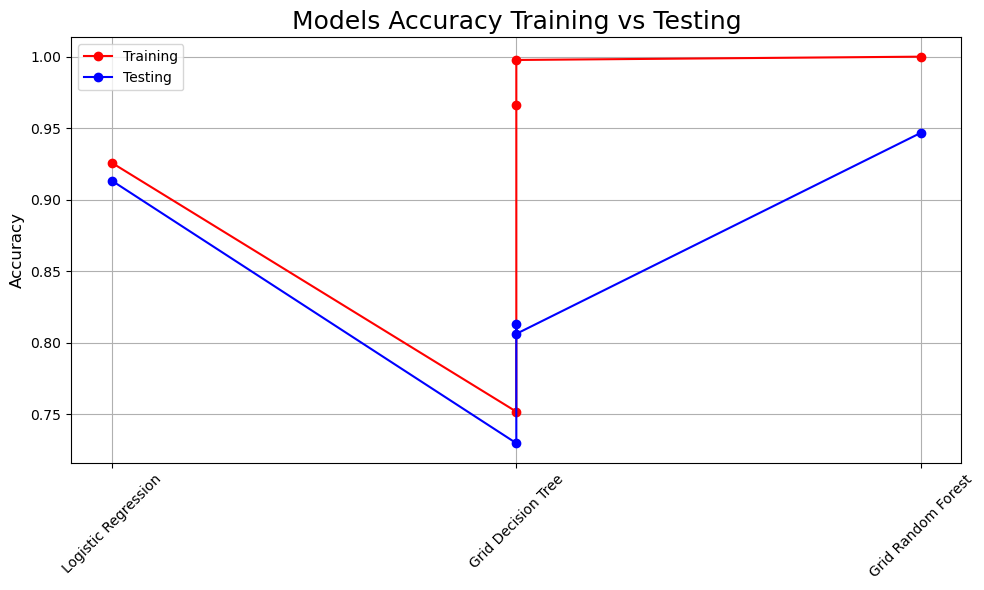

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(accuracy_grid['Model'], accuracy_grid['Training Accuracy'], marker='o', linestyle='-', color='red', label='Training')
plt.plot(accuracy_grid['Model'], accuracy_grid['Testing Accuracy'], marker='o', linestyle='-', color='blue', label='Testing')
plt.ylabel('Accuracy', fontsize=12)
plt.title('Models Accuracy Training vs Testing', fontsize=18)
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(fontsize=10) 
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1) 
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)  

class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1) 
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = X_train_tensor.shape[1]  
model = ANN(input_size)
criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001) 

num_epochs = 8000
batch_size = 16
for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        targets = y_train_tensor[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

print("Predictions:")
for i in range(10):
    print(f"Prediction: {y_pred[i][0]}, Actual: {y_test_tensor[i][0]}")


In [106]:
df_test = pd.read_csv("test.csv")
df_test1 = pd.read_csv("test.csv")

In [107]:
df_test1['ImageId'] = range(1, len(df_test1) + 1)

In [109]:
df_test1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,ImageId
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [110]:
pca = PCA(n_components=150)
df_test_submit = pca.fit_transform(df_test)
print("original shape df_test:", df_test.shape)
print("transformed shape df_test_submit:", df_test_submit.shape)

original shape df_test: (28000, 784)
transformed shape df_test_submit: (28000, 150)


In [111]:
predicted_values = GS_rf_model.predict(df_test_submit)

df_test1['Label'] = predicted_values

In [114]:
selected_columns = ['ImageId','Label']
df_submission = df_test1[selected_columns]
df_submission.to_csv('Sub1_GS_rf_model.csv', index=False)